In [1]:
import seaborn as sns
import pandas as pd
import ipywidgets as widgets

In [2]:
slider = widgets.IntSlider(
    value = 0,
    min = 0,
    max = 100,
    description = "Input number",
    orientation = "vertical",
    readout = True
)

In [3]:
def f(x):
    print(f"The value is: {x**3}")

In [4]:
widgets.interact(f, x=slider)

interactive(children=(IntSlider(value=0, description='Input number', orientation='vertical'), Output()), _dom_…

<function __main__.f(x)>

In [5]:
import numpy as np
import seaborn as sns
import pandas as pd

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from ipywidgets import interact

from flask import Flask, jsonify

In [6]:
engine = create_engine("sqlite:///Resources/database.sqlite")
conn=engine.connect()

# reflect an existing database into a new model
base = automap_base()
# reflect the tables
# base.prepare(engine,reflect=True)

base.prepare(autoload_with=engine)

In [7]:
inspector = inspect(engine)

list = inspector.get_table_names()

#table = list[0]



data

NameError: name 'data' is not defined

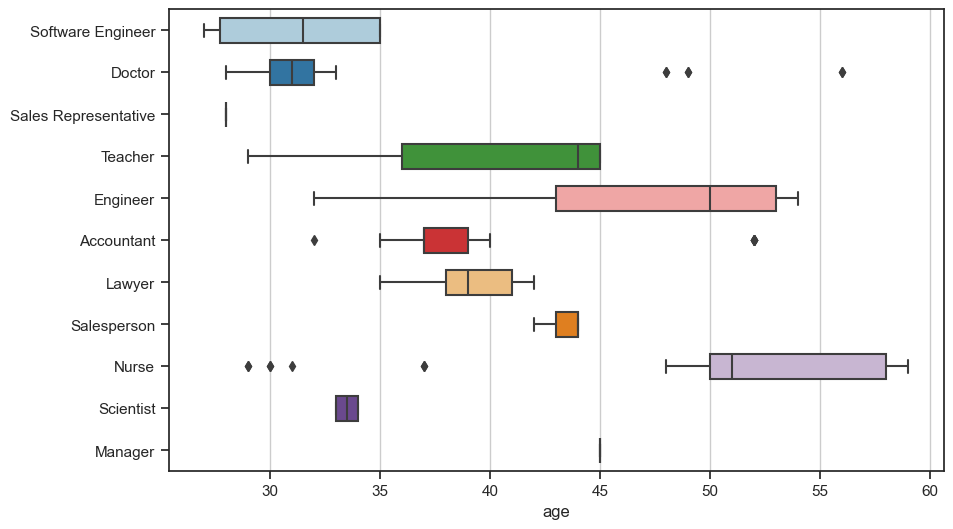

In [8]:
import matplotlib.pyplot as plt

data = pd.read_sql(
    f"SELECT * FROM person AS p \
        INNER JOIN occupation AS o ON o.id = p.occupation_id \
        INNER JOIN gender AS g ON p.gender_id = g.id",
    conn
    )

sns.set_theme(style = "ticks")

f, ax = plt.subplots(figsize = (10, 6))

sns.boxplot(
    data, x = "age", y = "occupation_name", width = 0.6, palette = "Paired",
)

# sns.stripplot(
#     data, x = "age", y = "occupation_name"
# )

ax.xaxis.grid(True)
ax.set(ylabel = "")
plt.show()

<Axes: xlabel='age', ylabel='occupation_name'>

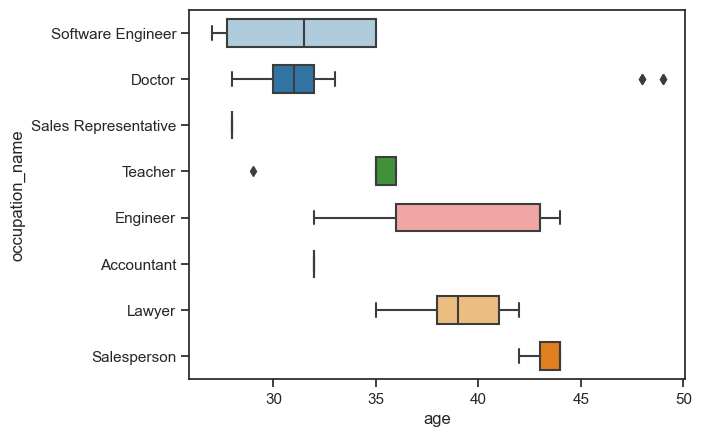

In [9]:
data1 = data.loc[data["gender_name"] == "Male", ["age", "gender_name", "occupation_name"]]

sns.boxplot(
       data1, x = "age", y = "occupation_name", width = 0.6, palette = "Paired",
    )

In [10]:
data = pd.read_sql(
f"SELECT * FROM person AS p \
    INNER JOIN occupation AS o ON o.id = p.occupation_id\
    INNER JOIN gender AS g ON p.gender_id = g.id\
    INNER JOIN health AS h ON h.person_id = p.id\
    INNER JOIN bmi AS b ON b.id = h.bmi_id",
    conn
    )

data.loc[(data["gender_name"] == "Male") & (data["bmi_name"] == "Obese"), ["gender_name", "bmi_name"]]

,gender_name,bmi_name
1,Male,Obese
69,Male,Obese
70,Male,Obese
71,Male,Obese
72,Male,Obese
75,Male,Obese
76,Male,Obese
77,Male,Obese
217,Male,Obese


In [21]:
data = pd.read_sql(
f"SELECT * FROM person AS p \
    INNER JOIN occupation AS o ON o.id = p.occupation_id\
    INNER JOIN gender AS g ON p.gender_id = g.id\
    INNER JOIN health AS h ON h.person_id = p.id\
    INNER JOIN bmi AS b ON b.id = h.bmi_id",
    conn
    )

# genders = data["gender_name"].unique().tolist()

dd1 = widgets.Dropdown(
    options = ["All", "Male", "Female"],
    value = "All",
    description = "Gender"
)

# bmis = data["bmi_name"].unique().tolist()

dd2 = widgets.Dropdown(
    options = ["All", "Normal", "Overweight", "Obese"],
    value = "All",
    description = "BMI Type"
)

def draw_plot(item1, item2):    
    if (item1 == "All"):
        if (item2 == "All"):
            mask = (data["gender_name"].isin(["Male", "Female"])) & (data["bmi_name"].isin(["Normal", "Overweight", "Obese"]))
        else:
            mask = (data["gender_name"].isin(["Male", "Female"])) & (data["bmi_name"] == item2)
    else:
        if (item2 == "All"):
            mask = (data["gender_name"] == item1) & (data["bmi_name"].isin(["Normal", "Overweight", "Obese"]))
        else:
            mask = (data["gender_name"] == item1) & (data["bmi_name"] == item2)
    sns.set_theme(style = "ticks")
    f, ax = plt.subplots(figsize = (8, 6))
    sns.boxplot(x = data.loc[mask, "age"],
                y = data.loc[mask, "occupation_name"], width = 0.6, palette = "Paired",
    )
    # ax.set_xlabel("Age", fontsize = 15)
    # ax.set_ylabel("Occupation", fontsize = 15)
    # plt.title(f"Distribution of Ages per Occupation ({item1})", fontsize = 18)

ddbox = widgets.HBox([dd1,dd2])

out1 = widgets.interactive_output(draw_plot, {"item1": dd1, "item2": dd2})
display(ddbox, out1)
    

Output()